# **Regression**

## Objectives

*   Fit and evaluate a regression model to predict Max Altitude (Hmax) for airplanes with that are likely having Multi Engine (or category in Engine Type)


## Inputs

* outputs/datasets/collection/airplane_performance_study.csv
* Instructions on which variables to use for data cleaning and feature engineering. They are found in their respective notebooks.

## Outputs

* Train set (features and target)
* Test set (features and target)
* ML pipeline to predict tenure
* labels map
* Feature Importance Plot



---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* Access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design/jupyter_notebooks'

Make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/data-driven-design'

---

# Load Data

In order to not compare apples with oranges the code below filters out all Multi Engined, jet and propjet leaving only the subset of **single Piston Engines**. It also drops these columns as well as the Turbo Prop performance modification column since it only refers to propjet Engines and the Hmax_(One) and ROC_(One)-columns since they only pertain to Multi Engined airplane.

In [4]:
import numpy as np
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/airplane_performance_study.csv")
      .query("Engine_Type == 1 and Multi_Engine == 0 and TP_mods == 0")  # subset of airplanes with single Piston Enginees without any Turbo Prop performance modification TP_mods dmultiple Engines
      .drop(labels=['Model', 'Company', 'THR', 'SHP', 'Engine_Type', 'Multi_Engine', 'TP_mods', 'Hmax_(One)', 'ROC_(One)'], axis=1)
      )

print(df.shape)
df.head(10)

(27, 16)


,Wing_Span,Length,Height,AUW,MEW,FW,Vmax,Vcruise,Vstall,Range,Hmax,ROC,Vlo,Slo,Vl,Sl
12,42.416667,33.083333,12.083333,5200.0,3150.0,536.0,128.472975,113.0,44.677972,528.313006,15821.745377,535.100314,900.000000,575.692111,707.224426,246.309124
28,59.200000,44.038445,15.313704,16000.0,6751.0,1701.8,166.000000,166.0,54.000000,610.000000,14704.835880,780.000000,2343.285672,2000.000000,1440.358832,669.473377
29,56.000000,33.500000,12.166667,12500.0,5829.0,1447.2,158.000000,126.0,52.000000,600.000000,8000.000000,650.000000,1756.907849,1830.000000,1949.973315,1634.223699
30,50.000000,30.752893,11.429067,9200.0,4488.0,1139.0,144.000000,126.0,60.000000,547.000000,21577.544015,760.000000,2005.300648,1170.000000,2210.643697,1260.453771
31,50.000000,45.195952,15.753430,9200.0,4123.0,1139.0,144.000000,126.0,60.000000,547.000000,22036.934145,760.000000,2052.961073,1170.000000,1851.291709,830.604750
32,49.000000,45.264445,15.784063,7860.0,3739.0,1139.0,122.000000,105.0,46.000000,574.000000,16880.470889,1000.000000,1345.778506,810.000000,1517.532366,871.472430
34,45.083333,36.738499,13.270990,7800.0,3550.0,844.2,200.000000,185.0,55.000000,129.113978,25192.761928,1500.000000,1759.828119,1000.000000,2371.646167,1543.376644
62,44.416667,33.000000,9.166667,6000.0,3600.0,1273.0,138.000000,130.0,57.000000,545.000000,25000.000000,1740.000000,1823.943639,600.000000,2179.158883,500.000000
68,57.916667,46.666667,14.333333,15000.0,9955.0,1534.0,312.000000,263.0,81.000000,1806.000000,35000.000000,2700.000000,4116.731629,3300.000000,3951.179185,2692.000000
71,57.916667,43.833333,14.833333,12590.0,8830.0,3645.0,310.000000,259.0,80.000000,1720.000000,35000.000000,2437.000000,2951.061823,2111.000000,2390.994732,2845.000000


Import Libraries (Cell 1)

Load and Preprocess Data (Cell 2)

Define Features and Target (Cell 3)

Split the Data (Cell 4)

Define and Save the Pipeline (Cell 5)

Evaluate Model (Cell 6)

Visualizations (Cell 7)

Define features and target

X are the features for the model (all columns in df except for target Wing_Span.
y is the target variable which is the Wing_Span column in the df.

In [5]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Define features and target
X = df.drop('Wing_Span', axis=1)  # Features (where I drop the target variable)
y = df['Wing_Span']                # Target variable

## Split Train Test Set

80% of df is split into the train set and 20% is left for the test set.
The random_state=0 parameter ensures reproducibility of the split.

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 80% to train and 20% to test.

print("* Train set:", X_train.shape, y_train.shape,
      "\n* Test set:",  X_test.shape, y_test.shape)

* Train set: (21, 15) (21,) 
* Test set: (6, 15) (6,)


# MP Pipeline: Regressor

## Create Pipeline

'scaler' applies standard scaling to the (numerical) features, ensuring that they have a mean = 0 and a standard deviation = 1.
'regressor' initializes Random Forest regression model for predicting target variable (Wing_Span).

In [7]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),                     # Scale numerical features
    ('regressor', RandomForestRegressor(random_state=0))  # Regression model using Random Forrest
])

Custom Class for hyperparameter optimisation

In [8]:
# Need to write this code!

## Grid Search CV - Sklearn

In [9]:
# Need to write this code!

## Fit the model

build the training model using the training dataset.

StandardScaler is applied to scale the features in X_train.

RandomForestRegressor is trained on the scaled features (from previous step) and corresponding target values.

In [10]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=0))])

## Make predictions

Scaling test features using StandardScaler fitted during training.

Using the trained RandomForestRegressor to predict on scaled test data.

Output: The predicted values for target (Wing_Span) stored in the predictions variable.

In [11]:
predictions = pipeline.predict(X_test)

## Assess feature importance

## Evaluate on Train and Test Sets (but now the code is only evaluating on the test set!)

## Mean Squared Error Calculation

The mean_squared_error computes the mean squared error (MSE) between the actual values (y_test) and the predicted values (predictions).

The MSE provids a quantitative measure of the model's performance on the test dataset.

In [12]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 10.941415245370358


Save above output

In [13]:
# Save MSE to a text file
with open('outputs/ml_pipeline/predict_analysis/mse.txt', 'w') as f:
    f.write(f'Mean Squared Error: {mse}\n')

## Print feature importances (for RandomForestRegressor)

feature_importance_df is created that in descending order (by importance) list an "importance score"-for each feature providing insights into which features are most influential in predicting the target variable (Wing_Span).

In [14]:
importances = pipeline.named_steps['regressor'].feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
print(feature_importance_df.sort_values(by='Importance', ascending=False))

    Feature  Importance
0    Length    0.473480
2       AUW    0.321005
1    Height    0.048814
3       MEW    0.031150
10      ROC    0.024729
12      Slo    0.021725
11      Vlo    0.013380
6   Vcruise    0.010606
9      Hmax    0.010577
13       Vl    0.009976
4        FW    0.009971
5      Vmax    0.009235
14       Sl    0.005633
7    Vstall    0.005132
8     Range    0.004589


Save above output

In [15]:
import joblib

# Save the feature importances as a .pkl file
joblib.dump(importances, 'outputs/ml_pipeline/predict_analysis/feature_importances.pkl')

# Save the feature names as a .pkl file
joblib.dump(feature_names.tolist(), 'outputs/ml_pipeline/predict_analysis/feature_names.pkl')

# Save the feature importance DataFrame as a .pkl file
joblib.dump(feature_importance_df, 'outputs/ml_pipeline/predict_analysis/feature_importance_df.pkl')


['outputs/ml_pipeline/predict_analysis/feature_importance_df.pkl']

## Plot Regression

### Predicted vs actual values

Importing Libraries: The code imports matplotlib.pyplot for plotting and seaborn (though it's not explicitly used in this block, it can enhance plots if needed).

Figure Setup: A new figure is created with a specified size (10x6 inches) for better visibility.

Scatter Plot: The actual vs. predicted values for Wing_Span are plotted using a scatter plot. The alpha=0.6 parameter makes the points slightly transparent, helping to visualize overlapping points.

Diagonal Line: A red dashed line is plotted from the minimum to maximum values of y_test. This line represents perfect predictions (where predicted values equal actual values).

Titles and Labels: The plot is given a title and labeled axes to clarify what is being represented.

Axis Limits: The x-axis and y-axis limits are set to match the range of the actual Wing_Span values.

Grid and Display: A grid is added for better readability, and plt.show() displays the plot.


The points in the scatter plot represent the predicted Wing_Span values (on the y-axis) against the actual Wing_Span values (on the x-axis) for the test set.


I need to check X_test and y_test and predictions to see why there are so few 

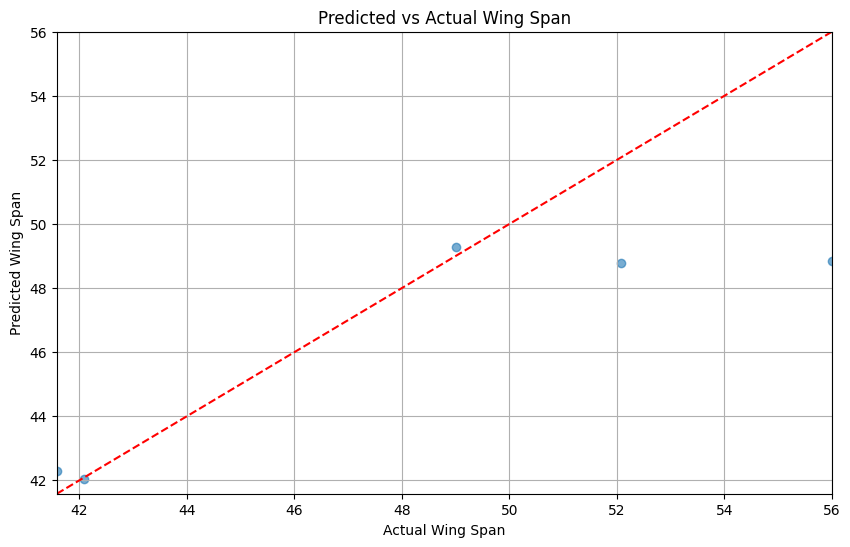

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Predicted vs Actual Wing Span')
plt.xlabel('Actual Wing Span')
plt.ylabel('Predicted Wing Span')
plt.xlim([y_test.min(), y_test.max()])
plt.ylim([y_test.min(), y_test.max()])
plt.grid()
plt.savefig('outputs/ml_pipeline/predict_analysis/predicted_vs_actual.png')  # Save the plot as a PNG file
plt.show()

### Residual plot

Calculating Residuals: The residuals are calculated by subtracting the predicted values (predictions) from the actual values (y_test). Residuals indicate the difference between what the model predicted and what the actual values were.

Figure Setup: A new figure is created with a specified size (10x6 inches).

Histogram Plot: The sns.histplot() function is used to create a histogram of the residuals, with a Kernel Density Estimate (KDE) overlaid. The KDE provides a smoothed estimate of the residuals' distribution.

Titles and Labels: The plot is given a title and labeled axes to clarify what is being represented.

Grid and Display: A grid is added for better readability, and plt.show() displays the plot.

This histogram helps visualize the distribution of the residuals, which can indicate how well the model is performing. Ideally, residuals should be normally distributed around zero if the model is a good fit.

The Residuals Distribution shows that the distribution of errors are such that most errors have an error of ca 1 meter (and that the model rather tend overestimate than underestimate the wingspan). Above that the errors appear to be evenly distribbuted between 1 and 7 meter




Distribution of Residuals: If you notice that there are very few (or no) negative residuals, it could suggest a few things:

Model Bias: The model may be biased toward overestimating the wingspan values. This can happen if the training data has characteristics that lead the model to make consistently higher predictions.
Data Characteristics: If the data itself has a distribution skewed towards larger wingspans, the model may learn to predict higher values more often.
Outliers or Data Issues: There might be outliers or peculiarities in the dataset that influence the predictions. It’s worth investigating the training data to see if there are any patterns or trends that could explain this distribution.
Model Evaluation: It's important to examine why there’s a bias in the residuals. You might consider looking into other metrics, performing diagnostics, or even adjusting the model to address this issue.

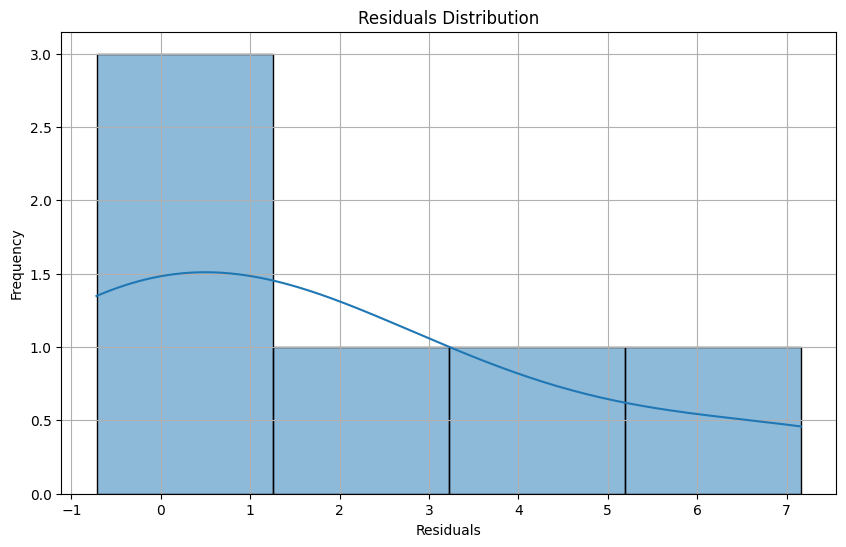

In [17]:
residuals = y_test - predictions
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid()
plt.savefig('outputs/ml_pipeline/predict_analysis/residuals_distribution.png')  # Save the plot as a PNG file
plt.show()

### Residuals vs Fitted plot

Each point represents a fitted value (predicted wingspan) from the train set plotted against its corresponding residual.

We do see here the same overestimation pattern that we saw in the Residuals distribution. Ideally, the residuals should be randomly scattered around the horizontal line at zero without any discernible pattern however our pattern appear to be "high". Note however that we only have five datapoints making for a very uncertain prediction, i.e. the high pattern might be due to chanse!

If we the "High pattern" is real it could indicate: it may indicate issues such as non-linearity, omitted variables, or model misspecification.

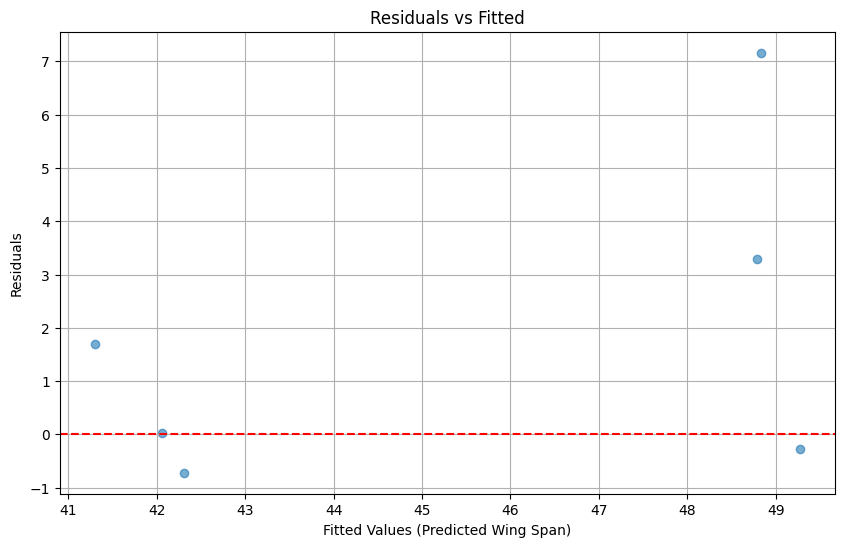

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted Values (Predicted Wing Span)')
plt.ylabel('Residuals')
plt.grid()
plt.savefig('outputs/ml_pipeline/predict_analysis/residuals_vs_fitted.png')  # Save the plot
plt.show()


## Save the file

Using joblib to save the pipeline to a subfolder under the output - folder

In [19]:
joblib.dump(pipeline, 'outputs/ml_pipeline/predict_analysis/wingspan_predictor_model.pkl')


['outputs/ml_pipeline/predict_analysis/wingspan_predictor_model.pkl']

---

---

---

---

---

---

# Push files to the repo

We will generate the following files

* Train set
* Test set
* Modeling pipeline
* label map
* features importance plot

In [20]:
import joblib
import os

version = 'v1'
file_path = f'outputs/ml_pipeline/predict_tenure/{version}'

try:
  os.makedirs(name=file_path)
except Exception as e:
  print(e)

[Errno 17] File exists: 'outputs/ml_pipeline/predict_tenure/v1'


## Train Set: features and target

In [21]:
X_train.head()

,Length,Height,AUW,MEW,FW,Vmax,Vcruise,Vstall,Range,Hmax,ROC,Vlo,Slo,Vl,Sl
774,30.083333,11.250000,4318.0,2900.0,1011.7,265.0,262.0,60.000000,1000.0,27000.0,3000.0,1200.000000,800.000000,1000.000000,800.000000
467,35.166667,14.250000,7394.0,4629.0,6032.0,330.0,252.0,91.828552,1730.0,31000.0,1653.0,2423.542163,2380.000000,2152.050052,2430.000000
668,29.833333,11.333333,6000.0,3650.0,1742.0,274.0,257.0,77.516253,1484.0,30000.0,1556.0,2635.000000,1784.744942,2659.000000,1437.406264
669,29.583333,11.333333,5092.0,3417.0,1139.0,260.0,245.0,69.000000,1000.0,30000.0,1556.0,2438.000000,1650.000000,2110.000000,1020.000000
470,34.916667,14.333333,7394.0,4651.0,1887.0,345.0,333.0,86.985250,1360.0,31000.0,1500.0,3273.534152,2832.000000,2332.550212,2427.000000


In [22]:
X_train.head().to_csv('outputs/ml_pipeline/predict_analysis/X_train_head.csv', index=False)

In [23]:
# Delete!!!!!!!!!!!!!!
# X_train.to_csv(f"{file_path}/X_train.csv", index=False)

In [24]:
y_train

774    43.000000
467    42.083333
668    43.250000
669    43.000000
470    41.583333
28     59.200000
300    51.666667
825    33.416667
776    37.833333
68     57.916667
34     45.083333
31     50.000000
629    53.250000
71     57.916667
62     44.416667
741    45.000000
30     50.000000
12     42.416667
670    43.000000
469    41.583333
302    52.083333
Name: Wing_Span, dtype: float64

In [25]:
y_train.to_csv('outputs/ml_pipeline/predict_analysis/y_train.csv', index=False)

In [26]:
# Delete!!!!!!!!!!!!!!
# y_train.to_csv(f"{file_path}/y_train.csv", index=False)

## Test Set: features and target

In [27]:
X_test.head()

,Length,Height,AUW,MEW,FW,Vmax,Vcruise,Vstall,Range,Hmax,ROC,Vlo,Slo,Vl,Sl
29,33.500000,12.166667,12500.0,5829.0,1447.2,158.0,126.0,52.000000,600.0,8000.000000,650.0,1756.907849,1830.0,1949.973315,1634.223699
775,30.083333,11.250000,4318.0,2900.0,1011.7,254.0,250.0,60.000000,1000.0,27000.000000,2500.0,1200.000000,800.0,1000.000000,800.000000
468,35.166667,14.250000,7394.0,4629.0,1949.7,330.0,252.0,87.442146,1730.0,31000.000000,1653.0,2868.520976,2380.0,2483.538114,2430.000000
471,34.916667,14.333333,6579.0,4050.0,1887.0,300.0,291.0,61.000000,1563.0,30000.000000,2380.0,1591.000000,1017.0,2034.000000,1181.000000
32,45.264445,15.784063,7860.0,3739.0,1139.0,122.0,105.0,46.000000,574.0,16880.470889,1000.0,1345.778506,810.0,1517.532366,871.472430


In [28]:
X_test.head().to_csv('outputs/ml_pipeline/predict_analysis/X_test_head.csv', index=False)

In [29]:
# X_test.to_csv(f"{file_path}/X_test.csv", index=False)

In [30]:
y_test

29     56.000000
775    43.000000
468    42.083333
471    41.583333
32     49.000000
301    52.083333
Name: Wing_Span, dtype: float64

In [31]:
y_test.to_csv('outputs/ml_pipeline/predict_analysis/y_test.csv', index=False)

In [32]:
#y_test.to_csv(f"{file_path}/y_test.csv", index=False)

## Modelling pipeline

ML pipeline for predicting tenure

In [33]:
# pipeline_clf

In [34]:
# joblib.dump(value=pipeline_clf, filename=f"{file_path}/clf_pipeline.pkl")

## List  mapping target levels to ranges

Map for converting numerical variable to categorical variable

In [35]:
# label_map

In [36]:
# joblib.dump(value=label_map, filename=f"{file_path}/label_map.pkl")

## Feature importance plot

In [37]:
# df_feature_importance.plot(kind='bar', x='Feature', y='Importance')
# plt.show()

In [38]:
# df_feature_importance.plot(kind='bar',x='Feature',y='Importance')
# plt.savefig(f'{file_path}/features_importance.png', bbox_inches='tight')

Good job! Clear cell's outputs, push to the repo using git commands and move on to the next notebook

---